In [1]:
pip install rdkit

     ---------------------------------------- 20.7/20.7 MB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
# import multifunctional libraries
import os
import numpy as np
import pandas as pd
import string
import pickle

In [3]:
os.getcwd()

'c:\\Users\\gabi1\\git\\ACTC_MD_ML\\gaby_notebooks'

In [4]:
os.chdir('..\\data\\generated')
os.getcwd()

'c:\\Users\\gabi1\\git\\ACTC_MD_ML\\data\\generated'

In [5]:
data = pd.read_csv('1-0-hgk-MD-ActCoeff-processed_Activity.csv', encoding='latin1')
#data = pd.DataFrame(data)
data.head()

,#,Name of the polymer,CounterIon,Co-Ion,salt,Water-per-ion,concentration of salt (M),gr_minima (Ion_H2O),gr_peak_position (Ion_H2O),gr_peak_height (Ion_H2O),Nr_(Ion_H2O),gr_minima (CG_H2O),gr_peak_position (CG_H2O),gr_peak_hight (CG_H2O),Nr_(CG_H2O),gr_minima (CG_Ion),gr_peak_position (CG_Ion),gr_peak_height (CG_Ion),Nr_(CG_Ion),Experimental activity co.
0,1,PSbNMP_RCE,I-,K+,KI,6,0.02,4.45,3.65,6.50,4.70,5.50,3.55,2.30,6.10,6.15,4.15,5.80,1.90,0.300000
1,2,PSbNMP_RCE,I-,K+,KI,6,0.20,4.45,3.65,6.30,4.60,5.50,3.55,1.90,5.00,6.15,4.15,5.80,2.00,0.319000
2,3,PSbNMP_RCE,I-,K+,KI,6,0.50,4.45,3.65,6.20,4.60,5.50,3.55,1.80,4.50,6.15,4.15,5.60,2.20,0.476000
3,4,PSbNMP_RCE,I-,K+,KI,6,1.00,4.55,3.65,6.00,4.70,5.00,3.55,1.50,3.00,6.15,4.15,5.10,2.50,0.663000
4,5,PVAS_RCE,Na+,Cl-,NaCl,113,0.02,3.15,2.35,8.55,5.38,3.37,2.76,1.83,2.98,3.06,2.35,6.71,0.13,0.280899


In [ ]:
#

In [7]:
#Change directory
os.chdir('../')
os.getcwd()


'c:\\Users\\gabi1\\git\\ACTC_MD_ML'

In [8]:
#load polimers
from src.polymerSMILES import polymers

polymers_dict = polymers.get_data()
polymers_dict

{'AR103': <rdkit.Chem.rdchem.Mol at 0x23238c82cf0>,
 'AR204': <rdkit.Chem.rdchem.Mol at 0x23238c82e40>,
 'CR61': <rdkit.Chem.rdchem.Mol at 0x23238c82f90>,
 'NAFION': <rdkit.Chem.rdchem.Mol at 0x23238c82f20>,
 'PVAS_BCE': <rdkit.Chem.rdchem.Mol at 0x23238cb0190>,
 'PVAS_RCE': <rdkit.Chem.rdchem.Mol at 0x23238cb0120>,
 'PSbNMP_BCE': <rdkit.Chem.rdchem.Mol at 0x23238c82eb0>,
 'PSbNMP_RCE': <rdkit.Chem.rdchem.Mol at 0x23238cb0040>,
 'CEM1': <rdkit.Chem.rdchem.Mol at 0x23238cb0200>,
 'CEM2': <rdkit.Chem.rdchem.Mol at 0x23238cb0270>,
 'CEM3': <rdkit.Chem.rdchem.Mol at 0x23238cb02e0>,
 'XLAPn4_9p': <rdkit.Chem.rdchem.Mol at 0x23238cb0350>,
 'XLAPn4_45p': <rdkit.Chem.rdchem.Mol at 0x23238cb03c0>}

In [9]:
from src.dataProcessing import *

In [10]:
preprocess = DataPreprocessing()

In [11]:
TanimotoIndex = preprocess.computeTanimotoSimilarity(polymers_dict, 'Tanimoto')

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

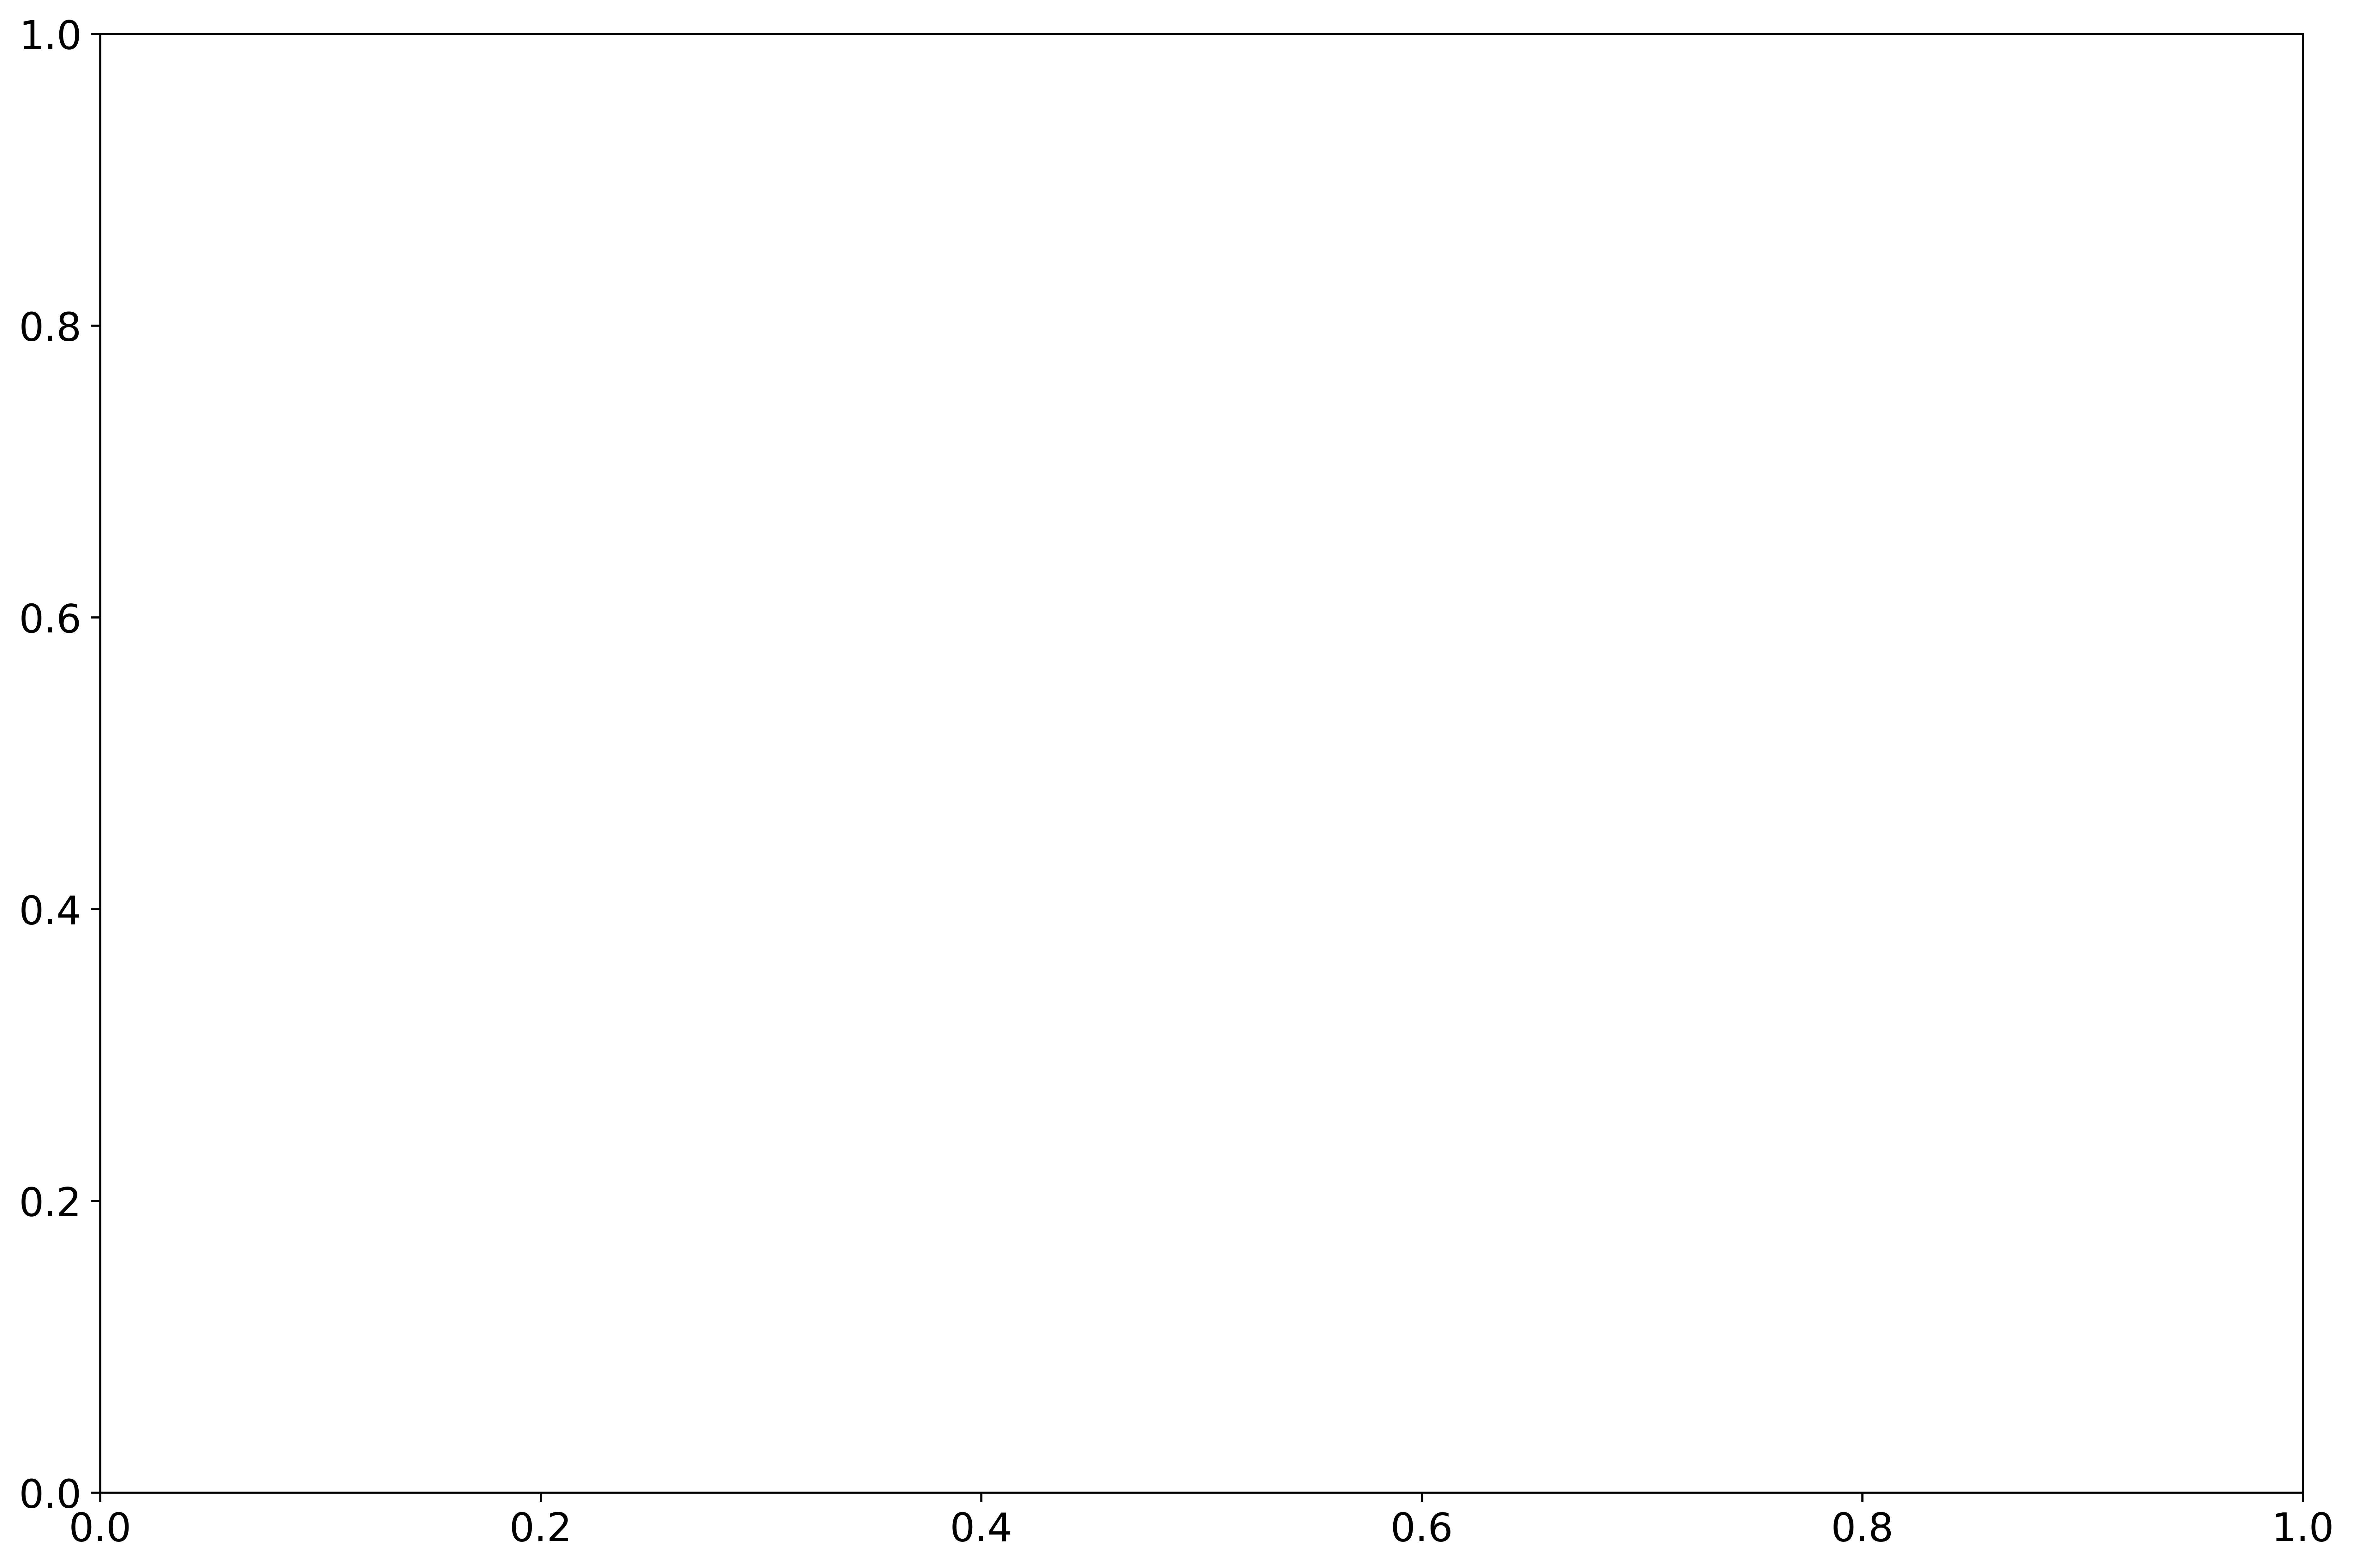

In [13]:
plt.rcParams.update({'font.size':15})

fig, ax = plt.subplots(figsize=(15,10), dpi =600)



In [14]:
#Triu fuct example(how does this works)
np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)


array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 0,  8,  9],
       [ 0,  0, 12]])

In [15]:
#mask let you do the diogonal

mask = np.triu(np.ones_like(TanimotoIndex, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True],
       [False, False, False,

In [33]:
len(list(TanimotoIndex.columns))

13

Text(0.5, 1.0, 'Title')

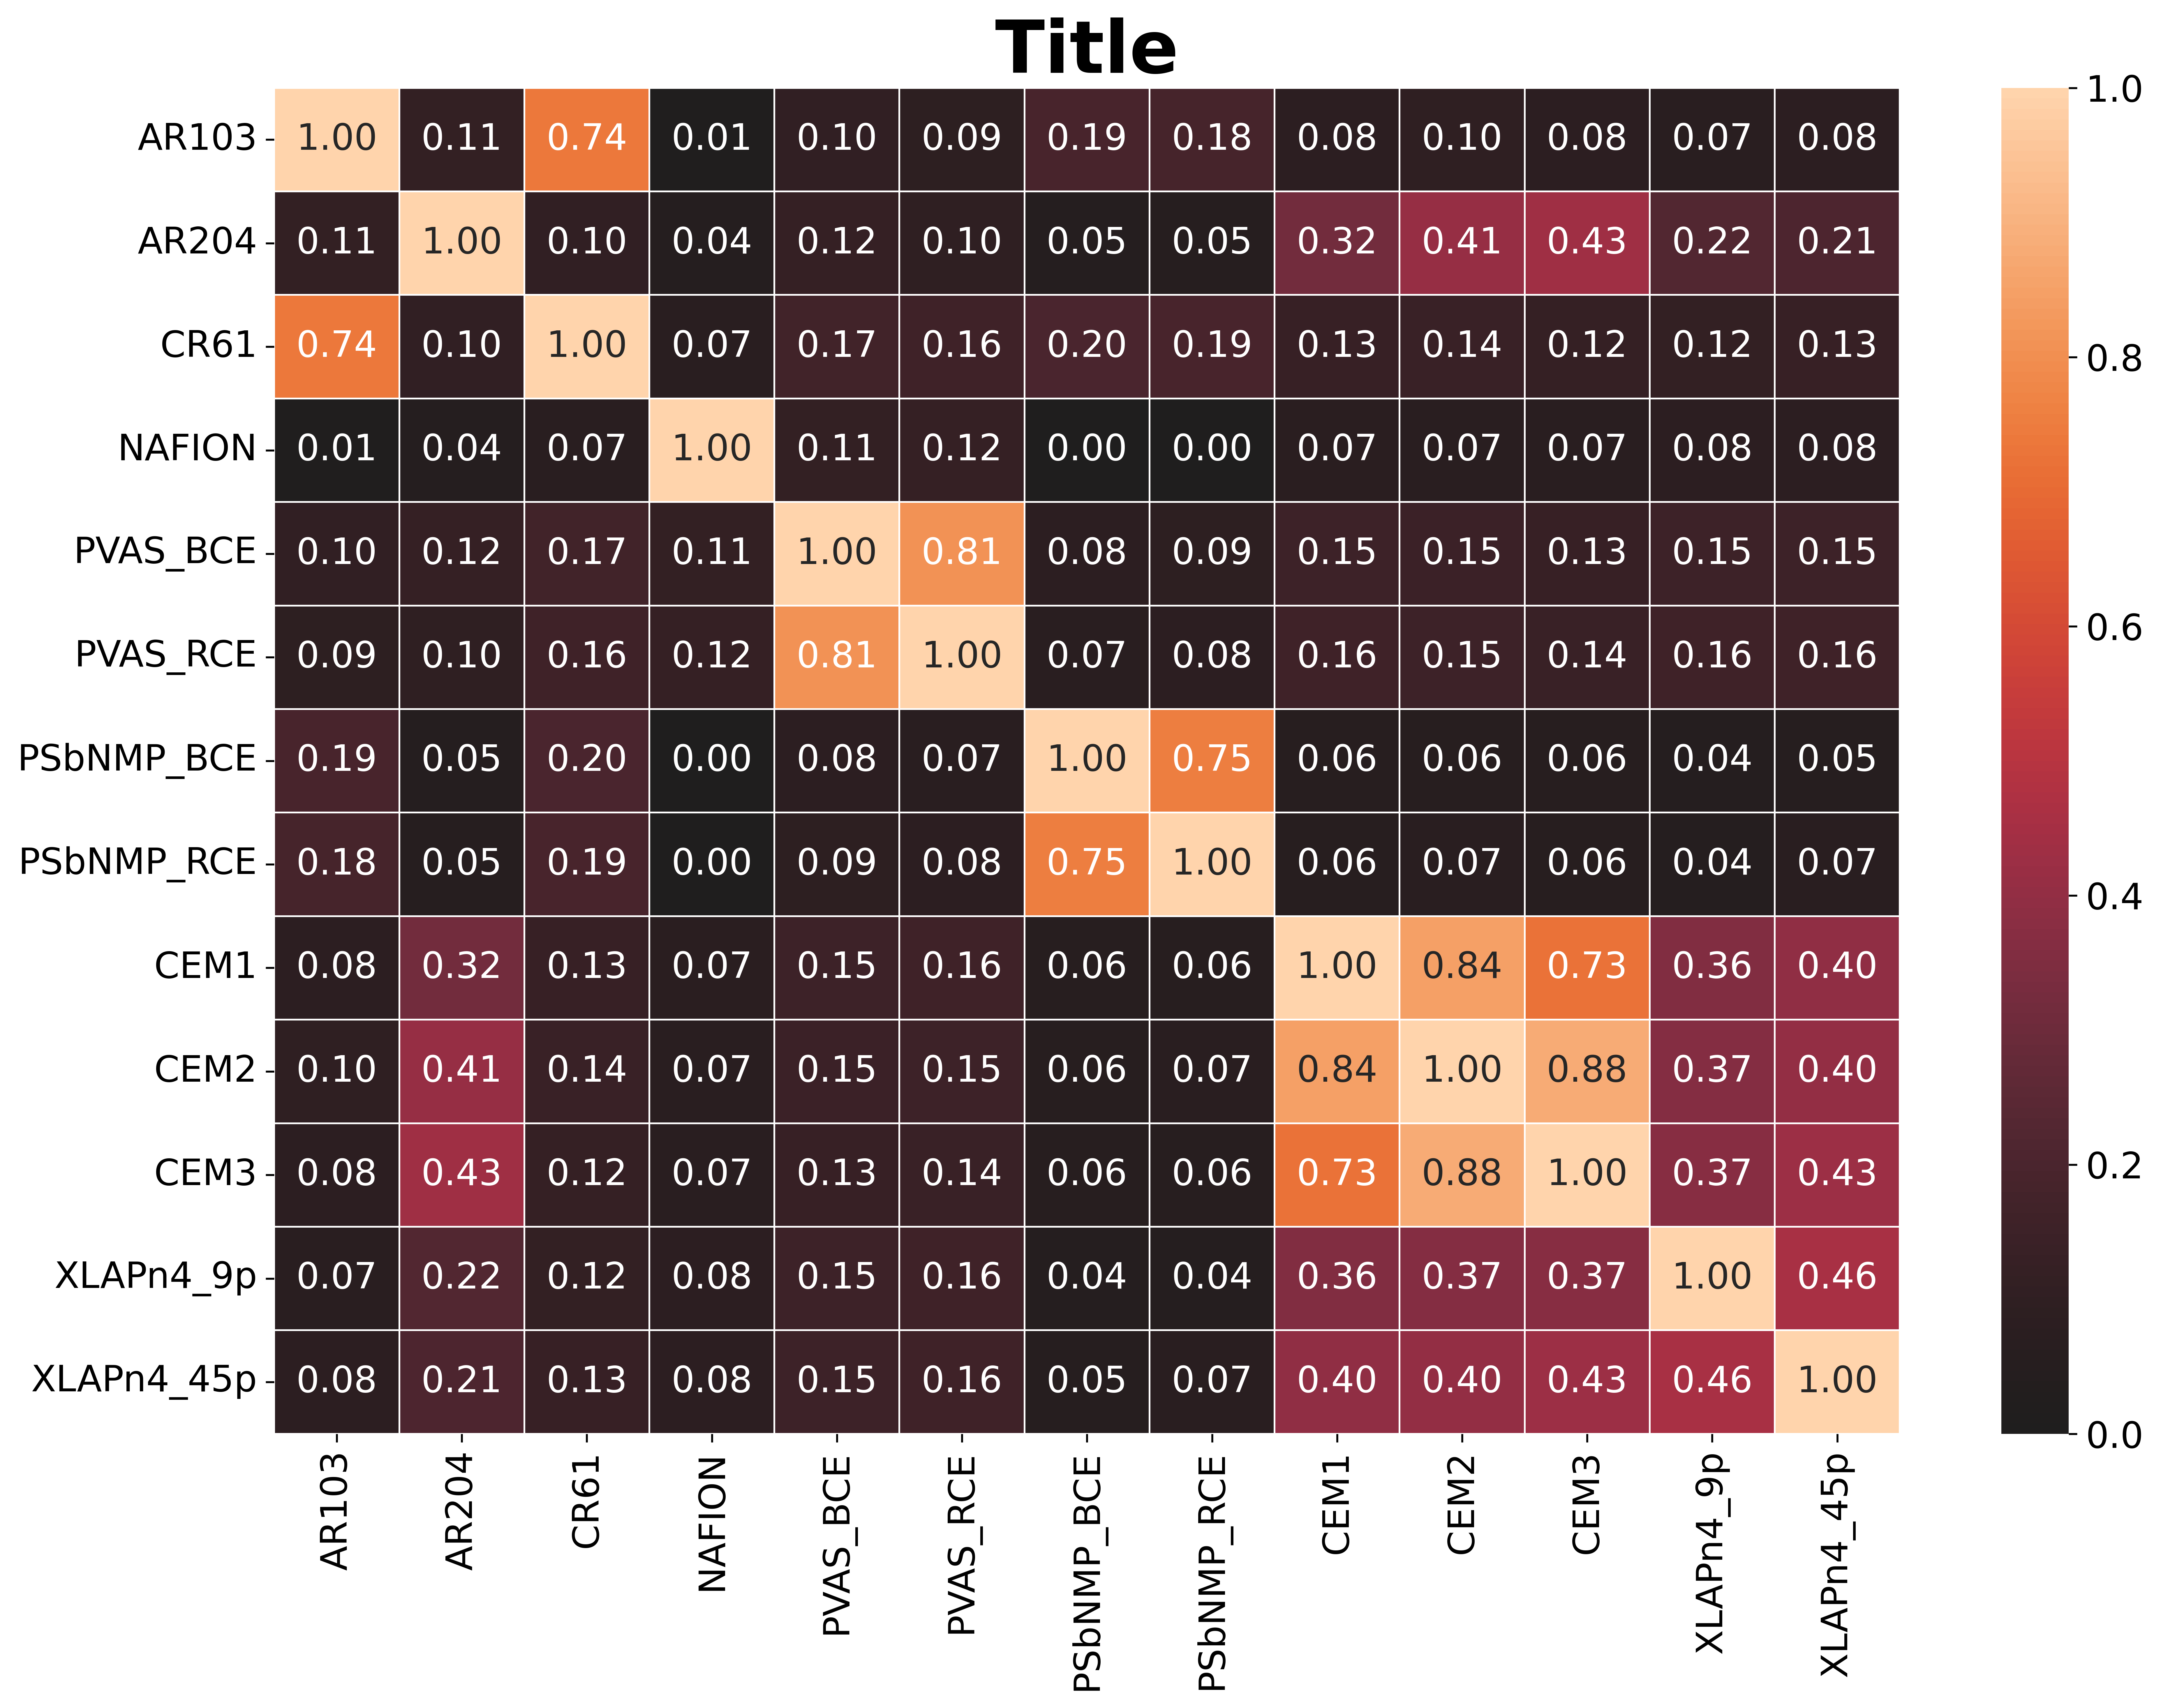

In [38]:
#plot without mask (the digonal)

plt.rcParams.update({'font.size':15})

fig, ax = plt.subplots(figsize=(15,10), dpi =600)

axs = sns.heatmap(TanimotoIndex,  annot = True, fmt = ".2f",center = 0, linewidths = .5)
cbar = ax.collections[0].colorbar; cbar.ax.tick_params(labelsize=15)
ax.set_title('Title', fontweight="bold", fontsize=30)
#labels = [f'p{i}' for i in string.ascii_uppercase[:len(list(TanimotoIndex.columns))]] # based on Figure 4 in the manuscript
#ax.set_xticklabels(labels, rotation = 90, fontsize=15)
#ax.set_yticklabels(labels, rotation = 360, fontsize=15)

Text(0.5, 1.0, 'Title')

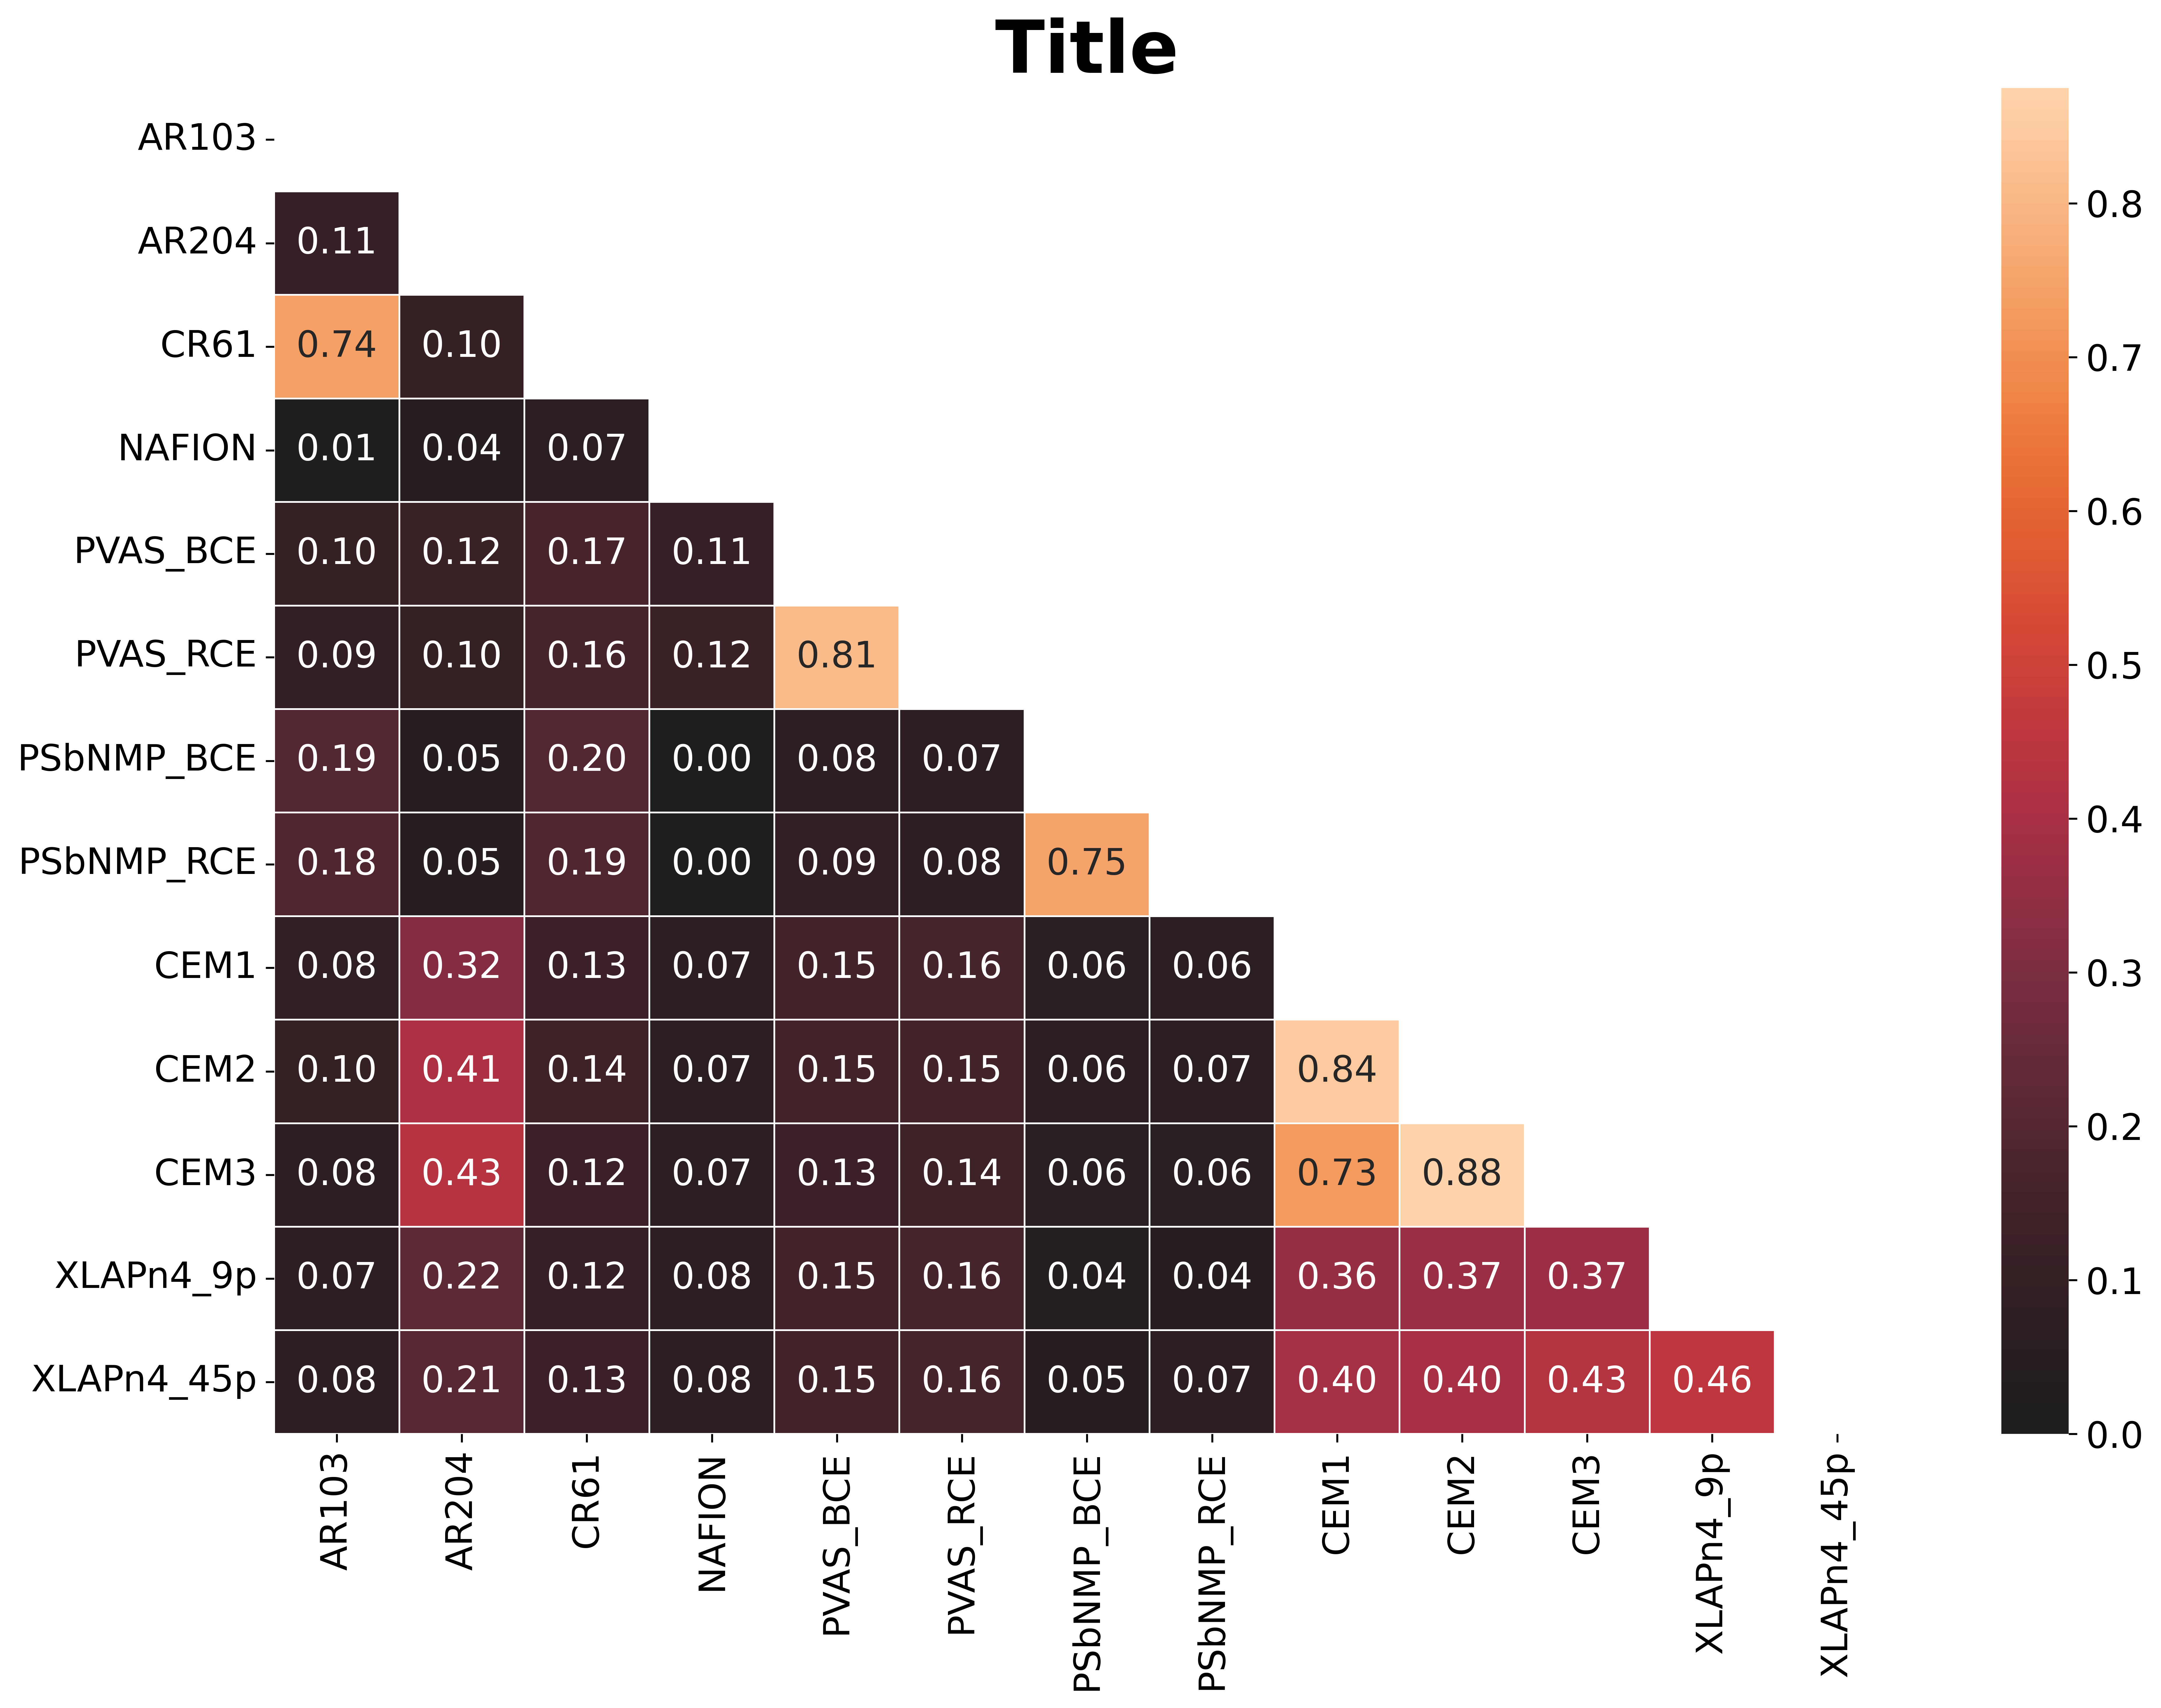

In [39]:
plt.rcParams.update({'font.size':15})

fig, ax = plt.subplots(figsize=(15,10), dpi =600)

axs = sns.heatmap(TanimotoIndex, mask = mask,  annot = True, fmt = ".2f",center = 0, linewidths = .5)
cbar = ax.collections[0].colorbar; cbar.ax.tick_params(labelsize=15)
ax.set_title('Title', fontweight="bold", fontsize=30)
#labels = [f'p{i}' for i in string.ascii_uppercase[:len(list(TanimotoIndex.columns))]] # based on Figure 4 in the manuscript
#ax.set_xticklabels(labels, rotation = 90, fontsize=15)
#ax.set_yticklabels(labels, rotation = 360, fontsize=15)